### **Week 9, Homework**

---

#### Problem 1 solution

In [1]:
# Change the following function.

# DO NOT CHANGE THE FUNCTION NAME AND ARGUMENTS!!!


# Packages to import
import numpy as np
from scipy.integrate import solve_ivp

def RingAttractorODEs_with_turning(t,f):
    
    v = 0.3 # some number between -0.3 and +0.3 works good
    
    tau = 0.05
    alpha = 2.6183
    beta = 1.9635
    D = 5.1876
    
    tmp = alpha*f + D*(np.roll(f,-1)+np.roll(f,1)-2*f) - beta*sum(f)  + 1  -v*(np.roll(f,-1)-np.roll(f,1))/2
    tmp[tmp<0] = 0
    
    dfdt = (  -f + tmp )/tau
    
    return dfdt

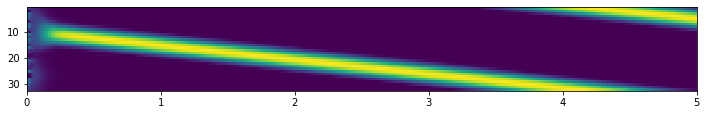

In [2]:
# The following code is provided for your test.
# You can modify it as you want, to test your function.

tspan = np.linspace(0, 5, 500)
f_init = np.random.random(size=(32,))*0.05

sol = solve_ivp(RingAttractorODEs_with_turning,
                [tspan[0], tspan[-1]], f_init, t_eval=tspan)

import matplotlib.pyplot as plt
plt.figure(1, figsize=(12,10))
plt.imshow(sol.y, extent=[0,tspan[-1],32.5,0.5], aspect=tspan[-1]/32/8)

---

#### Problem 2 solution

In [3]:
# Change the following function.

# DO NOT CHANGE THE FUNCTION NAME AND ARGUMENTS!!!

import numpy as np
import pandas as pd

def shrub_carbon(shrub):
    
    # Write code to add a new column, 'volume', to the dataframe 'shrub'
    shrub['volume'] = shrub.length * shrub.width * shrub.height

    
    # Write code to add a new column, 'shrub', to the dataframe 'shrub'
    # You need to use a numpy function 'log'
    shrub['total carbon'] = 1.8 + 2 * np.log(shrub.volume)

In [4]:
# The following code is provided for your test.
# You can modify it as you want, to test your function.

shrub = pd.read_csv('shrub-volume-data.csv')
shrub_carbon(shrub)
shrub

,site,experiment,length,width,height,volume,total carbon
0,1,1,2.2,1.3,9.6,27.456,8.425169
1,1,2,2.1,2.2,7.6,35.112,8.917086
2,1,3,2.7,1.5,2.2,8.910,6.174348
3,2,1,3.0,4.5,1.5,20.250,7.816310
4,2,2,3.1,3.1,4.0,38.440,9.098197
5,2,3,2.5,2.8,3.0,21.000,7.889045
6,3,1,1.9,1.8,4.5,15.390,7.267436
7,3,2,1.1,0.5,2.3,1.265,2.270144
8,3,3,3.5,2.0,7.5,52.500,9.721626
9,4,1,2.9,2.7,3.2,25.056,8.242227


---

#### Problem 3 solution

In [5]:
# If you encounter errors with 'describe()' function, run the following code.
# Then you MUST restart the kernal.
!pip install pandas --upgrade

# Also, whenever you restart the server you need to run the above code.

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Requirement already up-to-date: pandas in /opt/conda/lib/python3.7/site-packages (1.3.5)


In [6]:
# Change the following function.

# DO NOT CHANGE THE FUNCTION NAME AND ARGUMENTS!!!

import numpy as np
import pandas as pd

def shrub_class(shrub):
    
    # You don't have to follow the suggestions below. This is one way of solving the problem.
    # Make a new column 'class' and fill it with np.nan
    shrub['class'] = np.nan
    
    # Fill the column with 'tall', 'medium', and 'short'. Use conditional indexing
    shrub.loc[  shrub.height>=5                          , 'class' ] = 'tall'
    shrub.loc[  (shrub.height<5) & (shrub.height>=2)     , 'class' ] = 'medium'
    shrub.loc[  shrub.height<2                           , 'class' ] = 'short'
    
    # Use 'describe()' function. But select only 'total carbon' for print.
    tmp = shrub.loc[:,['total carbon','class']].groupby('class').describe()
    print(tmp)


In [7]:
# The following code is provided for your test.
# You can modify it as you want, to test your function.

shrub = pd.read_csv('shrub-volume-data.csv')
shrub_carbon(shrub)
shrub_class(shrub)
shrub

       total carbon                                                    \
              count      mean       std       min       25%       50%   
class                                                                   
medium          7.0  6.609731  2.294719  2.270144  5.750534  7.267436   
short           1.0  7.816310       NaN  7.816310  7.816310  7.816310   
tall            4.0  9.688218  1.436912  8.425169  8.794107  9.319356   

                              
              75%        max  
class                         
medium   8.065636   9.098197  
short    7.816310   7.816310  
tall    10.213468  11.688991  


,site,experiment,length,width,height,volume,total carbon,class
0,1,1,2.2,1.3,9.6,27.456,8.425169,tall
1,1,2,2.1,2.2,7.6,35.112,8.917086,tall
2,1,3,2.7,1.5,2.2,8.910,6.174348,medium
3,2,1,3.0,4.5,1.5,20.250,7.816310,short
4,2,2,3.1,3.1,4.0,38.440,9.098197,medium
5,2,3,2.5,2.8,3.0,21.000,7.889045,medium
6,3,1,1.9,1.8,4.5,15.390,7.267436,medium
7,3,2,1.1,0.5,2.3,1.265,2.270144,medium
8,3,3,3.5,2.0,7.5,52.500,9.721626,tall
9,4,1,2.9,2.7,3.2,25.056,8.242227,medium


---

#### Problem 4 solution

In [8]:
# Change the following function.

# DO NOT CHANGE THE FUNCTION NAME AND ARGUMENTS!!!

import numpy as np
import pandas as pd

def shrub_plot_scatter(shrub):
    
    # Copy the 'class' column to a variable 'color'
    color = shrub.loc[:,'class']
    
    # Replace 'tall', 'medium', and 'short' in 'color' to 'red', 'blue', and 'cyan'
    # Hint: You may want to use 'replace' function we used in the Breast Cancer data.
    color = color.replace(to_replace=['tall','medium','short'], value=['red', 'blue', 'cyan'])

    # Plot a scatter plot (You don't have to set the 's' argument. But you should set 'c' argument.)
    shrub.plot.scatter(x='length',y='total carbon',c=color)

       total carbon                                                    \
              count      mean       std       min       25%       50%   
class                                                                   
medium          7.0  6.609731  2.294719  2.270144  5.750534  7.267436   
short           1.0  7.816310       NaN  7.816310  7.816310  7.816310   
tall            4.0  9.688218  1.436912  8.425169  8.794107  9.319356   

                              
              75%        max  
class                         
medium   8.065636   9.098197  
short    7.816310   7.816310  
tall    10.213468  11.688991  


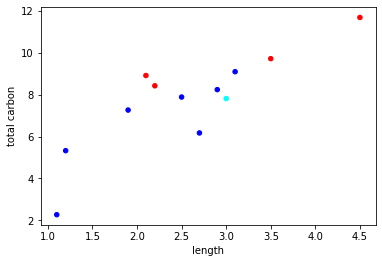

In [9]:
# The following code is provided for your test.
# You can modify it as you want, to test your function.

shrub = pd.read_csv('shrub-volume-data.csv')
shrub_carbon(shrub)
shrub_class(shrub)
shrub_plot_scatter(shrub)